# 1.4.15 Image Segmentation with Watershed Algorithm

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

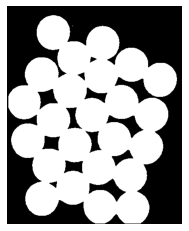

In [3]:
img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh,cmap='gray')
plt.axis('off')
plt.show

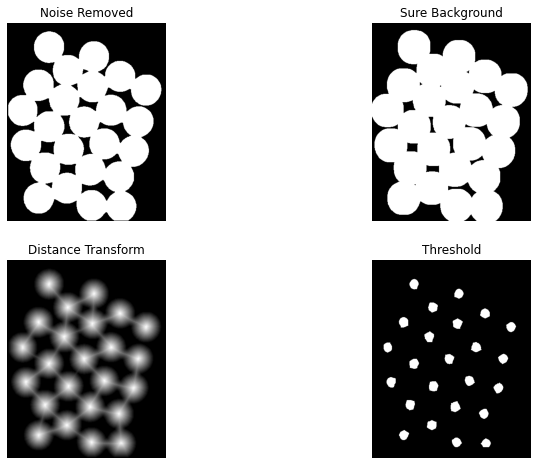

In [4]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(opening,cmap='gray')
plt.title("Noise Removed"), plt.axis('off')
plt.subplot(222), plt.imshow(sure_bg,cmap='gray')
plt.title("Sure Background"), plt.axis('off')
plt.subplot(223), plt.imshow(dist_transform,cmap='gray')
plt.title("Distance Transform"), plt.axis('off')
plt.subplot(224), plt.imshow(sure_fg,cmap='gray')
plt.title("Threshold"), plt.axis('off')
plt.show()

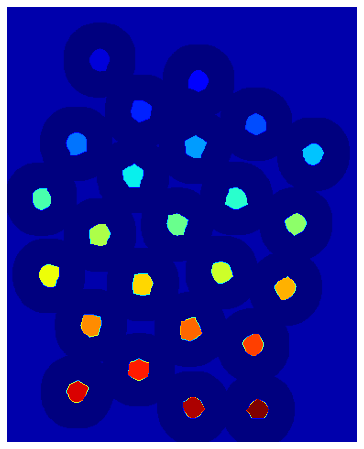

In [6]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

plt.figure(figsize=(12,8))
plt.imshow(markers, cmap='jet')
plt.axis('off')
plt.show()

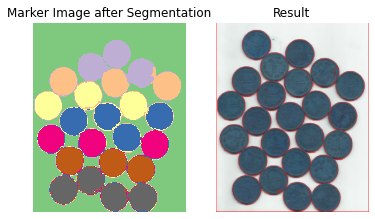

In [7]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(121),plt.imshow(markers,cmap="Accent")
plt.title("Marker Image after Segmentation"), plt.axis('off')
plt.subplot(122),plt.imshow(img)
plt.title('Result'), plt.axis('off')
plt.show()